In [2]:
!git clone 'https://github.com/vikkyshrma/CS231N'

Cloning into 'CS231N'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 86 (delta 17), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (86/86), done.


In [3]:
%cd /content/CS231N/Assign1

/content/CS231N/Assign1


In [0]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [5]:
%cd cs231n/datasets/
!ls

/content/CS231N/Assign1/cs231n/datasets
get_datasets.sh  ini


In [6]:
!more get_datasets.sh

# Get CIFAR10
wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
tar -xzvf cifar-10-python.tar.gz
rm cifar-10-python.tar.gz 


In [8]:
!sh get_datasets.sh

--2019-11-13 13:24:04--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz.1’

cifar-10-python.tar 100%[===================>] 162.60M  73.5MB/s    in 2.2s    

2019-11-13 13:24:06 (73.5 MB/s) - ‘cifar-10-python.tar.gz.1’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


data preprocessing

In [10]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
    #data preprocessing
    # Load the raw CIFAR-10 data
    cifar10_dir = '/content/CS231N/Assign1/cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev



try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


In [13]:
from cs231n.classifier.softmax import softmax_loss_naive
import time

# random softmax weight matrix and compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.329765
sanity check: 2.302585


In [14]:
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As we did for the SVM, use numeric gradient checking as a debugging tool.
# The numeric gradient should be close to the analytic gradient.
from cs231n.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

# similar to SVM case, do another gradient check with regularization
print('Regularization is turned on')
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: 0.338218 analytic: 0.338218, relative error: 1.874117e-07
numerical: -0.386114 analytic: -0.386114, relative error: 1.105347e-07
numerical: -0.496625 analytic: -0.496625, relative error: 1.333390e-07
numerical: -0.325533 analytic: -0.325533, relative error: 5.871346e-08
numerical: 2.889610 analytic: 2.889610, relative error: 1.762113e-08
numerical: -1.259604 analytic: -1.259604, relative error: 2.664929e-08
numerical: -0.984334 analytic: -0.984334, relative error: 9.993967e-09
numerical: -1.848104 analytic: -1.848104, relative error: 1.707579e-08
numerical: -2.503089 analytic: -2.503089, relative error: 6.055911e-09
numerical: 1.612131 analytic: 1.612131, relative error: 1.140904e-09
Regularization is turned on
numerical: 0.403661 analytic: 0.403661, relative error: 2.946093e-08
numerical: -1.899304 analytic: -1.899304, relative error: 1.082306e-08
numerical: 1.210321 analytic: 1.210321, relative error: 7.752039e-08
numerical: -1.708359 analytic: -1.708359, relative error: 7

In [16]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from cs231n.classifier.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

# As we did for the SVM, we use the Frobenius norm to compare the two versions
# of the gradient.
grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.329765e+00 computed in 0.154729s
vectorized loss: 2.329765e+00 computed in 0.020641s
Loss difference: 0.000000
Gradient difference: 0.000000


In [17]:

# Use the validation set to tune hyperparameters (regularization strength and
# learning rate)
from cs231n.classifier import Softmax
results = {}
best_val = -1
best_softmax = None
learning_rates = [5e-7, 8e-7, 1e-6, 3e-6]
regularization_strengths = [5e2, 1e3, 5e3]

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained softmax classifer in best_softmax.                          #
################################################################################
num_iters = 1200
hyperparameters = [(a, b) for a in learning_rates for b in regularization_strengths]
verbose = True

for rate, strength in hyperparameters: 
    softmax = Softmax()
    if verbose:
        print('rate: {}, strength {}'.format(rate, strength))
    softmax.train(X_train, y_train, learning_rate=rate, reg=strength,
                  num_iters=num_iters, verbose=verbose)
    y_train_pred = softmax.predict(X_train)
    y_val_pred = softmax.predict(X_val)
    train_accuracy = np.mean(y_train == y_train_pred)
    val_accuracy = np.mean(y_val == y_val_pred)
    results[(rate, strength)] = (train_accuracy, val_accuracy)
    if val_accuracy > best_val:
        best_val = val_accuracy
        best_softmax = softmax

rate: 5e-07, strength 500.0
iteration 0 / 1200: loss 21.667736
iteration 100 / 1200: loss 16.936178
iteration 200 / 1200: loss 15.222659
iteration 300 / 1200: loss 13.801108
iteration 400 / 1200: loss 12.389914
iteration 500 / 1200: loss 11.351852
iteration 600 / 1200: loss 10.323966
iteration 700 / 1200: loss 9.497238
iteration 800 / 1200: loss 8.691885
iteration 900 / 1200: loss 8.006234
iteration 1000 / 1200: loss 7.484672
iteration 1100 / 1200: loss 6.848983
rate: 5e-07, strength 1000.0
iteration 0 / 1200: loss 35.762204
iteration 100 / 1200: loss 27.845784
iteration 200 / 1200: loss 22.832156
iteration 300 / 1200: loss 18.782613
iteration 400 / 1200: loss 15.776452
iteration 500 / 1200: loss 12.982752
iteration 600 / 1200: loss 10.917450
iteration 700 / 1200: loss 9.392028
iteration 800 / 1200: loss 7.846827
iteration 900 / 1200: loss 6.856049
iteration 1000 / 1200: loss 5.906697
iteration 1100 / 1200: loss 5.121521
rate: 5e-07, strength 5000.0
iteration 0 / 1200: loss 161.228125


In [18]:
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 5.000000e-07 reg 5.000000e+02 train accuracy: 0.346776 val accuracy: 0.336000
lr 5.000000e-07 reg 1.000000e+03 train accuracy: 0.376429 val accuracy: 0.367000
lr 5.000000e-07 reg 5.000000e+03 train accuracy: 0.367694 val accuracy: 0.379000
lr 8.000000e-07 reg 5.000000e+02 train accuracy: 0.383878 val accuracy: 0.379000
lr 8.000000e-07 reg 1.000000e+03 train accuracy: 0.391571 val accuracy: 0.396000
lr 8.000000e-07 reg 5.000000e+03 train accuracy: 0.367571 val accuracy: 0.384000
lr 1.000000e-06 reg 5.000000e+02 train accuracy: 0.396082 val accuracy: 0.398000
lr 1.000000e-06 reg 1.000000e+03 train accuracy: 0.398612 val accuracy: 0.394000
lr 1.000000e-06 reg 5.000000e+03 train accuracy: 0.360327 val accuracy: 0.373000
lr 3.000000e-06 reg 5.000000e+02 train accuracy: 0.391694 val accuracy: 0.382000
lr 3.000000e-06 reg 1.000000e+03 train accuracy: 0.391878 val accuracy: 0.397000
lr 3.000000e-06 reg 5.000000e+03 train accuracy: 0.352857 val accuracy: 0.365000
best validation accuracy ach

In [19]:
y_test_pred = best_softmax.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('softmax on raw pixels final test set accuracy: %f' % (test_accuracy, ))

softmax on raw pixels final test set accuracy: 0.369000


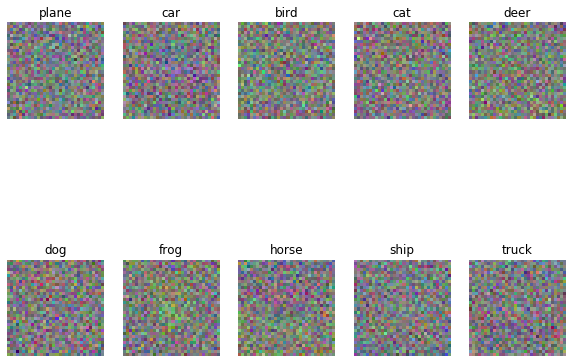

In [20]:
w = best_softmax.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])